# Perkenalan

Nama : Praduta Firman Anugrah

Batch : FTDS-002

Sumber Dataset : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset : Faktor performance dan job satisfaction dari karyawan attrition 

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

%matplotlib inline

# Data Loading

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
for col in data.columns:
    print(col, data[col].unique()[0:35], "\n")

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58] 

Attrition ['Yes' 'No'] 

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813] 

Department ['Sales' 'Research & Development' 'Human Resources'] 

DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13] 

Education [2 1 4 3 5] 

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

EmployeeCount [1] 

EmployeeNumber [ 1  2  4  5  7  8 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28 30
 31 32 33 35 36 38 39 40 41 42 45] 

EnvironmentSatisfaction [2 3 4 1] 

Gender ['Female' 'Male'] 

HourlyRate [94 61 92 56 40 79 81 67 44 84 49 31 93 50 51 80 96 78 45 82 53 83 58 72
 48 42 4

In [8]:
data.shape

(1470, 35)

# Eksplorasi Data

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [11]:
data['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Jadi di umur 35 tahun yang memiliki attrition tertinggi

In [12]:
data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [13]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [14]:
data['MonthlyIncome'].value_counts()

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [15]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

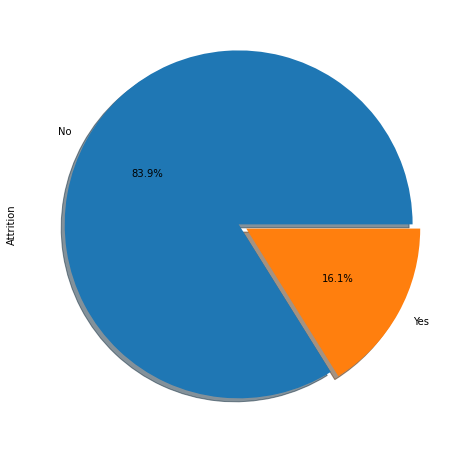

In [16]:
plt.figure(figsize=(8,8))
data['Attrition'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Jadi berdasarkan visualisasi di atas, attrition pada karyawan terdapat 16.1% pada data tersebut.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


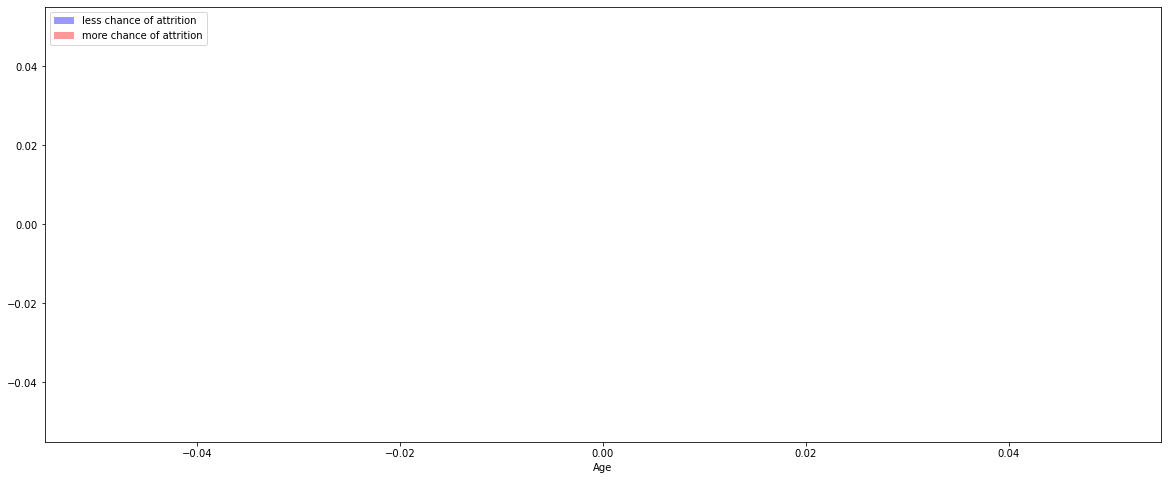

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(data['Age'][data['Attrition'] == 0], bins=[0,10,20,30,40,50,60,70,80,90], color='b', label='less chance of attrition')
sns.distplot(data['Age'][data['Attrition'] == 1], bins=[0,10,20,30,40,50,60,70,80,90], color='r', label='more chance of attrition')
plt.legend();

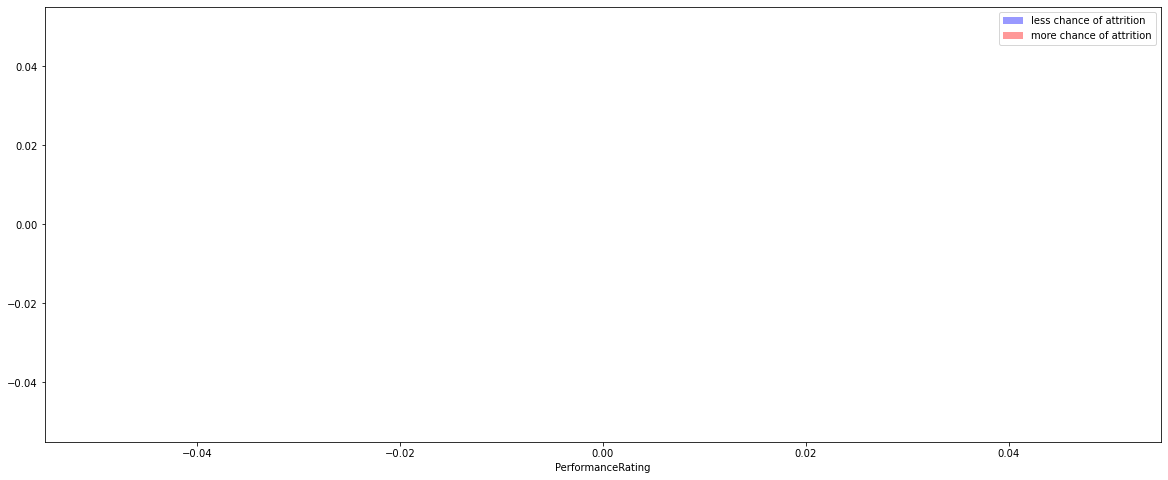

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(data['PerformanceRating'][data['Attrition'] == 0], bins=[225,1245], color='b', label='less chance of attrition')
sns.distplot(data['PerformanceRating'][data['Attrition'] == 1], bins=[225,1245], color='r', label='more chance of attrition')
plt.legend();

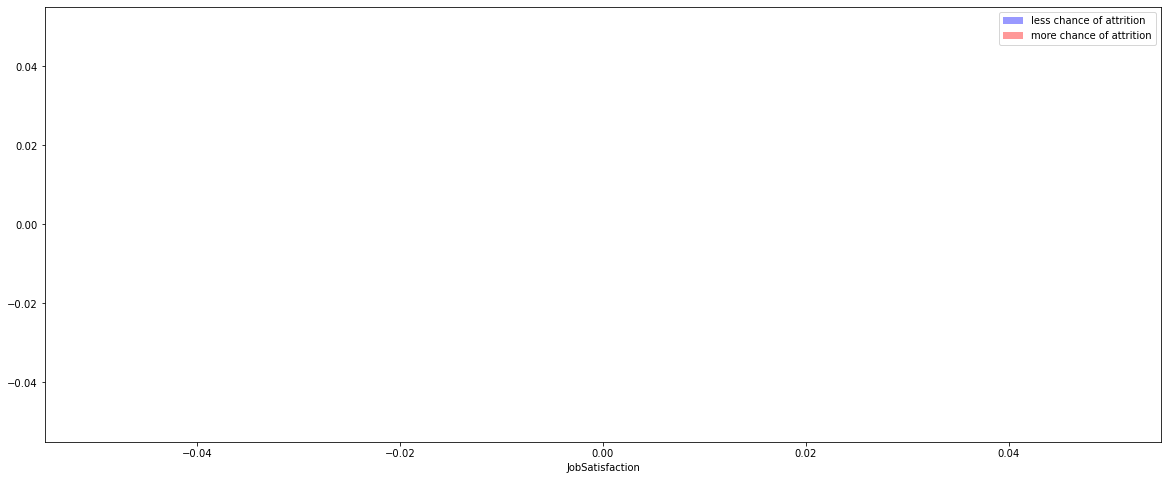

In [19]:
plt.figure(figsize=(20,8))
sns.distplot(data['JobSatisfaction'][data['Attrition'] == 0], bins=[250,460], color='b', label='less chance of attrition')
sns.distplot(data['JobSatisfaction'][data['Attrition'] == 1], bins=[250,460], color='r', label='more chance of attrition')
plt.legend();

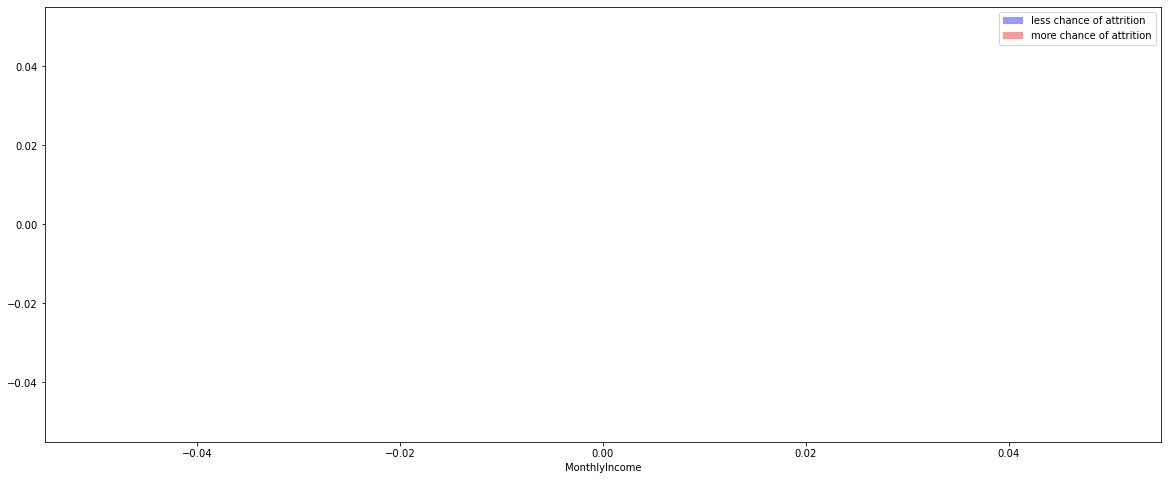

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(data['MonthlyIncome'][data['Attrition'] == 0], bins=[1,2,3,4], color='b', label='less chance of attrition')
sns.distplot(data['MonthlyIncome'][data['Attrition'] == 1], bins=[1,2,3,4], color='r', label='more chance of attrition')
plt.legend();

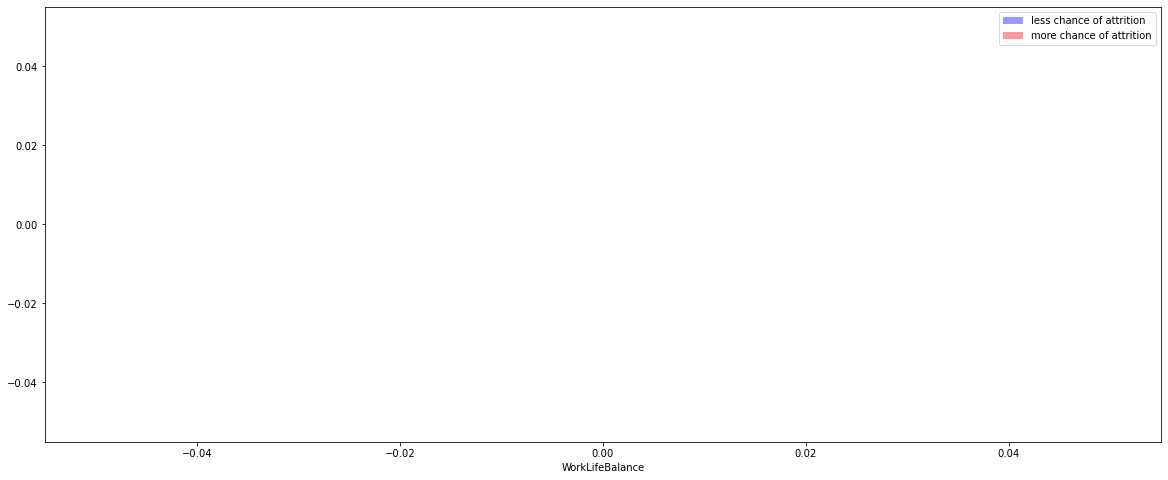

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(data['WorkLifeBalance'][data['Attrition'] == 0], bins=[60,150,300,900], color='b', label='less chance of attrition')
sns.distplot(data['WorkLifeBalance'][data['Attrition'] == 1], bins=[60,150,300,900], color='r', label='more chance of attrition')
plt.legend();

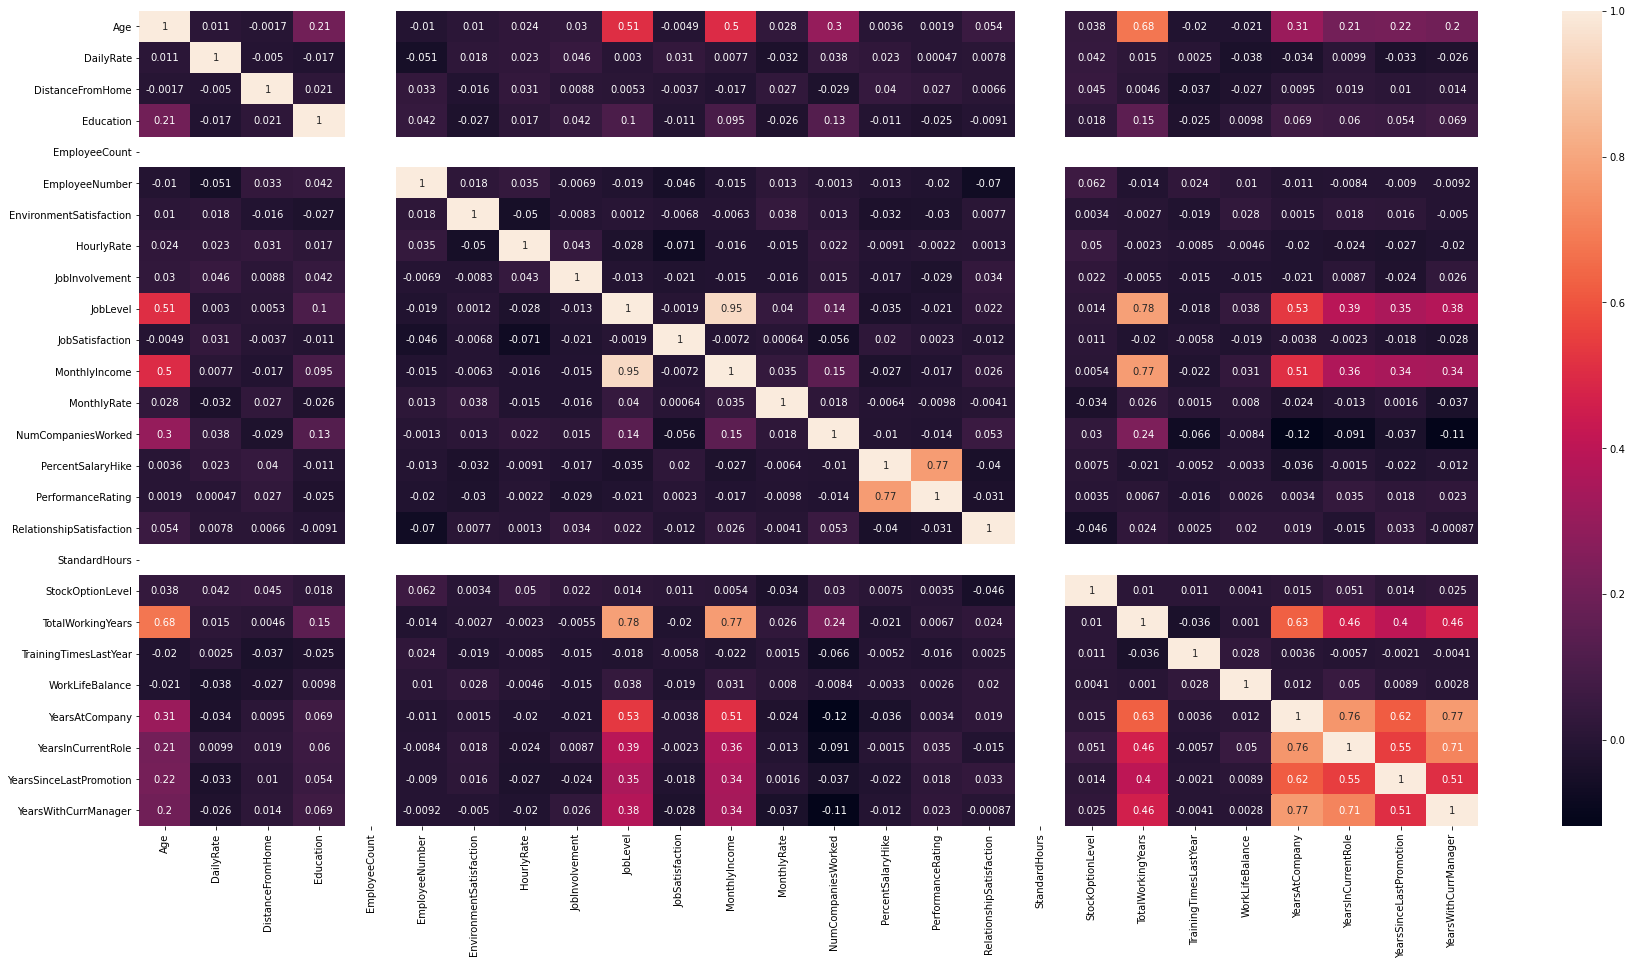

In [22]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True);

EDA Analysis :

- Berdasarkan semua visualisasi tersebut umur berpengaruh dikarenakan job level dan income yang cenderung rendah
- Kemudian berdasarkan performance karyawan berpengaruh karena persentase gaji
- Lalu job satisfaction dipengaruhi oleh jumlah sudah berapa kali karyawan tersebut bekerja di suatu perusahaan
- Dan Work life balance dipengaruhi oleh seberapa puasnya karyawan tersebut dalam bekerja.

In [23]:
BusinessTravel_mapping = { k: i for i, k in enumerate(data['BusinessTravel'].unique(), 0)}
Department_mapping = { k: i for i, k in enumerate(data['Department'].unique(), 0)}
EducationField_mapping = { k: i for i, k in enumerate(data['EducationField'].unique(), 0)}
Attrition_mapping = { k: i for i, k in enumerate(data['Attrition'].unique(), 0)}
Gender_mapping = { k: i for i, k in enumerate(data['Gender'].unique(), 0)}
JobRole_mapping = { k: i for i, k in enumerate(data['JobRole'].unique(), 0)}
MaritalStatus_mapping = { k: i for i, k in enumerate(data['MaritalStatus'].unique(), 0)}
OverTime_mapping = { k: i for i, k in enumerate(data['OverTime'].unique(), 0)}
Over18_mapping = { k: i for i, k in enumerate(data['Over18'].unique(), 0)}

print('\n')
print('BusinessTravel: \n',BusinessTravel_mapping)
print('\n')
print('Department: \n',Department_mapping)
print('\n')
print('EducationField: \n',EducationField_mapping)
print('\n')
print('Attrition: \n',Attrition_mapping)
print('\n')
print('Gender: \n',Gender_mapping)
print('\n')
print('JobRole: \n',JobRole_mapping)
print('\n')
print('MaritalStatus: \n',MaritalStatus_mapping)
print('\n')
print('OverTime: \n',OverTime_mapping)
print('\n')
print('Over18: \n',Over18_mapping)



BusinessTravel: 
 {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}


Department: 
 {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}


EducationField: 
 {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}


Attrition: 
 {'Yes': 0, 'No': 1}


Gender: 
 {'Female': 0, 'Male': 1}


JobRole: 
 {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}


MaritalStatus: 
 {'Single': 0, 'Married': 1, 'Divorced': 2}


OverTime: 
 {'Yes': 0, 'No': 1}


Over18: 
 {'Y': 0}


In [24]:
data['BusinessTravel'] = data['BusinessTravel'].map(BusinessTravel_mapping)
data['Department'] = data['Department'].map(Department_mapping)
data['EducationField'] = data['EducationField'].map(EducationField_mapping)
data['Attrition'] = data['Attrition'].map(Attrition_mapping)
data['Gender'] = data['Gender'].map(Gender_mapping)
data['JobRole'] = data['JobRole'].map(JobRole_mapping)
data['MaritalStatus'] = data['MaritalStatus'].map(MaritalStatus_mapping)
data['OverTime'] = data['OverTime'].map(OverTime_mapping)
data['Over18'] = data['Over18'].map(Over18_mapping)

Mengecek kembali data sudah berubah numerik atau belum

In [25]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Preprocessing

In [26]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.shape[0]

1029

In [29]:
X_test.shape[0]

441

In [30]:
X.shape[0]

1470

# Pendefinisian Model dan Training Model

In [31]:
tree_model = DecisionTreeClassifier(min_samples_leaf=16, random_state=42)

%time tree_model.fit(X_train, y_train)

Wall time: 18 ms


DecisionTreeClassifier(min_samples_leaf=16, random_state=42)

In [32]:
rfc_model = RandomForestClassifier(n_estimators=200, random_state=42)

%time rfc_model.fit(X_train, y_train)

Wall time: 761 ms


RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluasi Model

Decision Tree Classifier

In [33]:
%time y_pred_tree = tree_model.predict(X_test)

Wall time: 27 ms


In [34]:
print(confusion_matrix(y_test, y_pred_tree))

[[ 18  43]
 [ 40 340]]


In [35]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.31      0.30      0.30        61
           1       0.89      0.89      0.89       380

    accuracy                           0.81       441
   macro avg       0.60      0.59      0.60       441
weighted avg       0.81      0.81      0.81       441



Dari evaluasi model Decesion Tree Classifier diperoleh nilai accuracy 0.81

In [36]:
y_pred_proba_tree = tree_model.predict_proba(X_test)

In [37]:
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_precision = precision_score(y_test, y_pred_tree)
tree_roc_auc_score = roc_auc_score(y_test, y_pred_proba_tree[:,1])

Random Forest Classifier

In [38]:
%time y_pred_rfc = rfc_model.predict(X_test)

Wall time: 105 ms


In [39]:
print(confusion_matrix(y_test, y_pred_rfc))

[[  6  55]
 [  3 377]]


In [40]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        61
           1       0.87      0.99      0.93       380

    accuracy                           0.87       441
   macro avg       0.77      0.55      0.55       441
weighted avg       0.84      0.87      0.82       441



Dari evaluasi model Random Forest Classifier diperoleh nilai accuracy 0.87

In [41]:
y_pred_proba_rfc = rfc_model.predict_proba(X_test)

In [42]:
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_roc_auc_score = roc_auc_score(y_test, y_pred_proba_rfc[:,1])

# Model Analysis

In [43]:
model = pd.Series(['Decesion Tree Classifier', 'Random Forest Classifier'])

In [44]:
accuracy = pd.Series([tree_accuracy, rfc_accuracy])
recall = pd.Series([tree_recall, rfc_recall])
precision = pd.Series([tree_precision, rfc_precision])
roc_auc_score = pd.Series([tree_roc_auc_score, rfc_roc_auc_score])

In [45]:
choose_model = pd.DataFrame({'model': model, 'accuracy': accuracy, 'recall': recall, 'precision': precision, 'roc_auc_score': roc_auc_score })
choose_model

,model,accuracy,recall,precision,roc_auc_score
0,Decesion Tree Classifier,0.811791,0.894737,0.887728,0.654961
1,Random Forest Classifier,0.868481,0.992105,0.872685,0.778840


Dari hasil analisis perbandingan antar model Decision Tree classfier dan Random Forest Classifier terlihat bahwa model Random Forest Classifier memiliki nilai performa yang lebih baik yaitu dengan nilai accuracy 0.868, nilai recall 0.99, nilai precision 0.87, dan roc auc score sebesar 0.778

# Hyperparameter Tunning

Grid Search Decision Tree

In [46]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(min_samples_leaf=16, random_state=42)

# hyperparameter
tree_params_grid = dict(
    criterion= ['gini', 'entropy'],
    min_samples_leaf= [16, 20]
)

# search
tree_grid = GridSearchCV(tree_model, tree_params_grid, scoring='accuracy')

%time search_tree_grid = tree_grid.fit(X,y)

Wall time: 553 ms


In [47]:
search_tree_grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 20}

In [48]:
results = pd.DataFrame(search_tree_grid.cv_results_)[['params', 'mean_test_score']]
results

,params,mean_test_score
0,"{'criterion': 'gini', 'min_samples_leaf': 16}",0.840136
1,"{'criterion': 'gini', 'min_samples_leaf': 20}",0.848980
2,"{'criterion': 'entropy', 'min_samples_leaf': 16}",0.849660
3,"{'criterion': 'entropy', 'min_samples_leaf': 20}",0.850340


melakukan Hyperparameter tunning Decision Tree Classifier dengan parameter :

criterion= ['gini'entropy'],
min_samples_leaf= [16,20]
diperoleh best parameter sebagai berikut:

criterion= 'entropy',
min_samples_leaf= 20
dengan nilai accuracy 0.85

Grid Search Random Forest Classsifier

In [49]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=200, random_state=42)

# hyperparameter
rfc_params_grid = dict(
    n_estimators=[100,200],
    max_depth= [1, 2]
)

# search
rfc_grid = GridSearchCV(rfc_model, rfc_params_grid, scoring='accuracy')

%time search_rfc_grid = rfc_grid.fit(X,y)

Wall time: 8.09 s


In [50]:
search_rfc_grid.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [51]:
results = pd.DataFrame(search_rfc_grid.cv_results_)[['params', 'mean_test_score']]
results

,params,mean_test_score
0,"{'max_depth': 1, 'n_estimators': 100}",0.838776
1,"{'max_depth': 1, 'n_estimators': 200}",0.838776
2,"{'max_depth': 2, 'n_estimators': 100}",0.838776
3,"{'max_depth': 2, 'n_estimators': 200}",0.838776


melakukan Hyperparameter tunning Random Forest Classifier dengan parameter :

n_estimators=[100,200],
max_depth= [1, 2]
diperoleh best parameter sebagai berikut:

n_estimators= 200,
max_depth= 2
dengan nilai accuracy 0.84

# Model Inference

In [52]:
values = [[41, 0, 0, 1102, 0, 1, 2, 0, 1, 1, 1, 80, 0, 8, 0, 1, 6, 4, 0]]

In [53]:
data_dummies = pd.DataFrame(values,columns=['Age', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [54]:
data_dummies

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,1,80,0,8,0,1,6,4,0


In [ ]:
prediction = rfc_model.predict(data_dummies)

print("Hasil prediksi: \n")
if prediction == 0:
    print("Pasien memiliki peluang kecil terkena serangan jantung")
else:
    print("Pasien memiliki peluang besar terkena serangan jantung")

Hasil prediksi: 

Karyawan memiliki peluang besar melakukan Attrition